In [1]:
# Cell 1: Import necessary libraries
import json
import random
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\0sann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0sann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\0sann\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\0sann\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Cell 2: Define data generation helper lists
companies = [
    "Google", "Microsoft", "Amazon", "Meta", "Apple", "IBM", "Intel", "Oracle", 
    "Salesforce", "Adobe", "Twitter", "LinkedIn", "Netflix", "Uber", "Airbnb"
]

universities = [
    "MIT", "Stanford University", "Carnegie Mellon", "UC Berkeley", "Georgia Tech",
    "University of Michigan", "University of Illinois", "Harvard University",
    "California Institute of Technology", "University of Washington"
]

skills_by_category = {
    "Programming Languages": [
        "Python", "Java", "JavaScript", "C++", "Ruby", "Go", "Rust", "PHP",
        "Swift", "Kotlin", "TypeScript", "Scala", "R", "MATLAB"
    ],
    "Web Technologies": [
        "HTML5", "CSS3", "React", "Angular", "Vue.js", "Node.js", "Django",
        "Flask", "Spring Boot", "Express.js", "GraphQL", "REST APIs"
    ],
    "Databases": [
        "MySQL", "PostgreSQL", "MongoDB", "Redis", "Cassandra", "Oracle",
        "SQL Server", "ElasticSearch", "DynamoDB", "Neo4j"
    ],
    "Cloud & DevOps": [
        "AWS", "Azure", "Google Cloud", "Docker", "Kubernetes", "Jenkins",
        "GitLab CI", "Terraform", "Ansible", "Prometheus", "ELK Stack"
    ],
    "AI & Data Science": [
        "Machine Learning", "Deep Learning", "TensorFlow", "PyTorch", "Scikit-learn",
        "NLP", "Computer Vision", "Data Mining", "Statistical Analysis", "Big Data"
    ]
}

job_titles = [
    "Software Engineer", "Senior Software Engineer", "Full Stack Developer",
    "Data Scientist", "Machine Learning Engineer", "DevOps Engineer",
    "Frontend Developer", "Backend Developer", "Cloud Architect",
    "Data Engineer", "Site Reliability Engineer", "Security Engineer",
    "Mobile Developer", "QA Engineer", "Product Manager"
]

In [3]:
# Cell 3: Define data generation functions
def random_date():
    end = datetime.now()
    start = end - timedelta(days=3650)
    return (start + timedelta(days=random.randint(0, 3650))).strftime("%Y-%m")

def generate_experience():
    company = random.choice(companies)
    title = random.choice(job_titles)
    start_date = random_date()
    return {
        "company": company,
        "title": title,
        "start_date": start_date,
        "responsibilities": [
            f"Led development of {random.choice(['web', 'mobile', 'cloud', 'ML'])} applications",
            f"Collaborated with {random.randint(3, 15)} team members on {random.choice(['frontend', 'backend', 'full-stack'])} projects",
            f"Improved system performance by {random.randint(20, 80)}%"
        ]
    }

def generate_education():
    university = random.choice(universities)
    degrees = ["Bachelor's", "Master's", "Ph.D."]
    fields = ["Computer Science", "Software Engineering", "Data Science", 
              "Information Technology", "Artificial Intelligence"]
    return {
        "university": university,
        "degree": random.choice(degrees),
        "field": random.choice(fields),
        "graduation_year": random.randint(2010, 2023)
    }

def generate_skills():
    skills = []
    for category in skills_by_category.values():
        skills.extend(random.sample(category, k=random.randint(2, 5)))
    return list(set(skills))

In [4]:
# Cell 4: Define resume and job generation functions
def generate_resume(candidate_id):
    return {
        "candidate_id": f"CAND_{candidate_id:04d}",
        "name": f"Candidate {candidate_id}",
        "summary": f"Experienced professional with {random.randint(2, 15)} years in software development",
        "experience": [generate_experience() for _ in range(random.randint(2, 5))],
        "education": generate_education(),
        "skills": generate_skills()
    }

def generate_job(job_id):
    title = random.choice(job_titles)
    return {
        "job_id": f"JOB_{job_id:04d}",
        "title": title,
        "company": random.choice(companies),
        "required_experience": f"{random.randint(3, 8)}+ years",
        "required_skills": generate_skills(),
        "preferred_skills": generate_skills(),
        "education": f"{random.choice(['Bachelor\'s', 'Master\'s'])} in Computer Science or related field",
        "job_description": f"We are seeking an experienced {title} to join our team...",
        "responsibilities": [
            "Design and implement scalable solutions",
            "Collaborate with cross-functional teams",
            f"Work with {random.choice(['cloud', 'AI', 'web', 'mobile'])} technologies"
        ]
    }

In [5]:
# Cell 5: Generate sample data
num_resumes = 100
num_jobs = 20

resumes = [generate_resume(i) for i in range(1, num_resumes + 1)]
jobs = [generate_job(i) for i in range(1, num_jobs + 1)]

print(f"Generated {len(resumes)} resumes and {len(jobs)} jobs")

Generated 100 resumes and 20 jobs


In [6]:
# Cell 6: Define matching functions
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

def convert_resume_to_text(resume):
    text_parts = [
        resume['summary'],
        ' '.join([exp['title'] + ' ' + exp['company'] + ' ' + 
                 ' '.join(exp['responsibilities']) for exp in resume['experience']]),
        resume['education']['degree'] + ' ' + resume['education']['field'],
        ' '.join(resume['skills'])
    ]
    return ' '.join(text_parts)

def convert_job_to_text(job):
    text_parts = [
        job['title'],
        job['job_description'],
        ' '.join(job['responsibilities']),
        ' '.join(job['required_skills']),
        ' '.join(job['preferred_skills'])
    ]
    return ' '.join(text_parts)

In [7]:
# Cell 7: Create a detailed view of all candidates
def display_candidate_details(resumes):
    # Create a list to store formatted candidate information
    candidate_details = []
    
    for resume in resumes:
        # Calculate total years of experience
        num_experiences = len(resume['experience'])
        
        # Get most recent skills
        skills_str = ', '.join(resume['skills'])
        
        # Format education
        education = resume['education']
        education_str = f"{education['degree']} in {education['field']} from {education['university']} ({education['graduation_year']})"
        
        # Get current/most recent role
        current_role = resume['experience'][0]
        
        # Create detail dictionary
        detail = {
            'Candidate ID': resume['candidate_id'],
            'Name': resume['name'],
            'Current Role': current_role['title'],
            'Current Company': current_role['company'],
            'Total Positions': num_experiences,
            'Education': education_str,
            'Skills': skills_str
        }
        candidate_details.append(detail)
    
    # Convert to DataFrame and display
    df_details = pd.DataFrame(candidate_details)
    
    # Set display options for better viewing
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.width', None)
    
    # Create an interactive display with sorting capabilities
    from IPython.display import display
    display(df_details)
    
    # Print some summary statistics
    print("\nSummary Statistics:")
    print(f"Total Candidates: {len(resumes)}")
    print(f"Average Positions per Candidate: {df_details['Total Positions'].mean():.1f}")
    
    # Count and display most common current roles
    print("\nMost Common Current Roles:")
    print(df_details['Current Role'].value_counts().head())
    
    # Count and display most common skills
    all_skills = [skill for resume in resumes for skill in resume['skills']]
    skill_counts = pd.Series(all_skills).value_counts()
    print("\nMost Common Skills:")
    print(skill_counts.head())
    
    return df_details

# Run the function
candidate_df = display_candidate_details(resumes)

,Candidate ID,Name,Current Role,Current Company,Total Positions,Education,Skills
0,CAND_0001,Candidate 1,Cloud Architect,Netflix,5,Master's in Information Technology from California Institute of Technology (2017),"C++, Redis, PyTorch, GraphQL, JavaScript, ElasticSearch, Azure, Angular, Statistical Analysis, Kotlin, Scikit-learn, Machine Learning, Ansible, Vue.js, Cassandra, Ruby, Scala"
1,CAND_0002,Candidate 2,Site Reliability Engineer,Microsoft,4,Ph.D. in Data Science from University of Washington (2013),"Statistical Analysis, GitLab CI, Redis, Rust, Ruby, Scala, DynamoDB, Azure, Machine Learning, MySQL, React, Data Mining, Go, Prometheus, Docker, PostgreSQL, Computer Vision, Java, REST APIs, TensorFlow"
2,CAND_0003,Candidate 3,Senior Software Engineer,LinkedIn,5,Master's in Data Science from Georgia Tech (2019),"Computer Vision, REST APIs, Neo4j, MongoDB, HTML5, Big Data, Python, Google Cloud, SQL Server, Scikit-learn, MySQL, GitLab CI, Swift, Vue.js, Cassandra, Go, Ruby, TypeScript"
3,CAND_0004,Candidate 4,QA Engineer,Meta,3,Bachelor's in Computer Science from Harvard University (2014),"Redis, Java, Oracle, REST APIs, MongoDB, DynamoDB, NLP, TensorFlow, Angular, Statistical Analysis, Kotlin, Kubernetes, Scikit-learn, GitLab CI, Swift, Ruby, Docker"
4,CAND_0005,Candidate 5,Data Scientist,Oracle,3,Bachelor's in Software Engineering from California Institute of Technology (2016),"Terraform, Redis, REST APIs, JavaScript, Neo4j, ElasticSearch, Python, TensorFlow, Statistical Analysis, Machine Learning, MATLAB, Ansible, Cassandra, Django"
...,...,...,...,...,...,...,...
95,CAND_0096,Candidate 96,Senior Software Engineer,IBM,5,Ph.D. in Computer Science from Stanford University (2015),"Express.js, GitLab CI, CSS3, Big Data, Google Cloud, Kotlin, Ruby, PyTorch, MongoDB, DynamoDB, Azure, Machine Learning, Swift, Prometheus, C++, PostgreSQL, Deep Learning, AWS, TypeScript"
96,CAND_0097,Candidate 97,Cloud Architect,Twitter,2,Bachelor's in Artificial Intelligence from University of Illinois (2016),"GraphQL, JavaScript, NLP, Big Data, Rust, MATLAB, Cassandra, Spring Boot, PyTorch, DynamoDB, Node.js, Data Mining, React, Swift, ELK Stack, Go, Oracle, HTML5, TensorFlow, Jenkins"
97,CAND_0098,Candidate 98,Software Engineer,Airbnb,5,Bachelor's in Information Technology from UC Berkeley (2014),"Python, NLP, GitLab CI, Vue.js, Redis, Big Data, ElasticSearch, SQL Server, Kotlin, Scikit-learn, Ansible, Scala, PyTorch, Azure, Node.js, MySQL, Swift, ELK Stack, Computer Vision, Oracle, REST APIs, HTML5"
98,CAND_0099,Candidate 99,Security Engineer,Netflix,3,Ph.D. in Software Engineering from University of Michigan (2016),"NLP, Big Data, Rust, Angular, SQL Server, Scikit-learn, Kubernetes, Spring Boot, MongoDB, MySQL, React, ELK Stack, Docker, PHP, Java, REST APIs, Deep Learning, HTML5, AWS, TensorFlow"



Summary Statistics:
Total Candidates: 100
Average Positions per Candidate: 3.4

Most Common Current Roles:
Current Role
Senior Software Engineer     12
Frontend Developer           11
Cloud Architect              10
Site Reliability Engineer     9
Software Engineer             9
Name: count, dtype: int64

Most Common Skills:
SQL Server      45
PyTorch         44
Scikit-learn    43
MongoDB         40
GraphQL         39
Name: count, dtype: int64


In [8]:
# Cell 8: Define matching algorithm
def match_resumes_to_jobs(resumes, jobs, top_n=5):
    results = []
    
    for resume in resumes:
        resume_text = convert_resume_to_text(resume)
        candidate_matches = []
        
        for job in jobs:
            job_text = convert_job_to_text(job)
            
            # Create TF-IDF vectors and calculate similarity
            vectorizer = TfidfVectorizer()
            vectors = vectorizer.fit_transform([resume_text, job_text])
            similarity = cosine_similarity(vectors[0:1], vectors[1:2])[0][0]
            
            # Calculate skill match percentage
            required_skills = set(job['required_skills'])
            candidate_skills = set(resume['skills'])
            skill_match = len(required_skills.intersection(candidate_skills)) / len(required_skills)
            
            candidate_matches.append({
                'candidate_id': resume['candidate_id'],
                'candidate_name': resume['name'],
                'job_id': job['job_id'],
                'job_title': job['title'],
                'company': job['company'],
                'similarity_score': round(similarity * 100, 2),
                'skill_match': round(skill_match * 100, 2),
                'matching_skills': list(required_skills.intersection(candidate_skills))
            })
        
        # Sort matches by similarity score and take top N
        candidate_matches.sort(key=lambda x: x['similarity_score'], reverse=True)
        results.extend(candidate_matches[:top_n])
    
    return pd.DataFrame(results)

In [9]:
# Cell 9: Run matching and display results
results = match_resumes_to_jobs(resumes, jobs)

# Display top 10 matches
print("\nTop 10 Matches:")
top_matches = results.sort_values('similarity_score', ascending=False).head(10)
print(top_matches[['candidate_name', 'job_title', 'company', 'similarity_score', 'skill_match']].to_string())


Top 10 Matches:
    candidate_name                 job_title   company  similarity_score  skill_match
285   Candidate 58      Full Stack Developer     Intel             31.30        33.33
220   Candidate 45         Security Engineer       IBM             30.93        68.75
221   Candidate 45             Data Engineer      Meta             30.90        50.00
425   Candidate 86      Full Stack Developer     Intel             29.90        38.89
25     Candidate 6      Full Stack Developer     Intel             28.78        44.44
375   Candidate 76      Full Stack Developer     Intel             28.29        38.89
376   Candidate 76      Full Stack Developer    Airbnb             27.70        56.25
222   Candidate 45  Senior Software Engineer  LinkedIn             26.19        53.85
310   Candidate 63  Senior Software Engineer    Airbnb             25.86        52.94
410   Candidate 83      Full Stack Developer    Airbnb             25.75        31.25


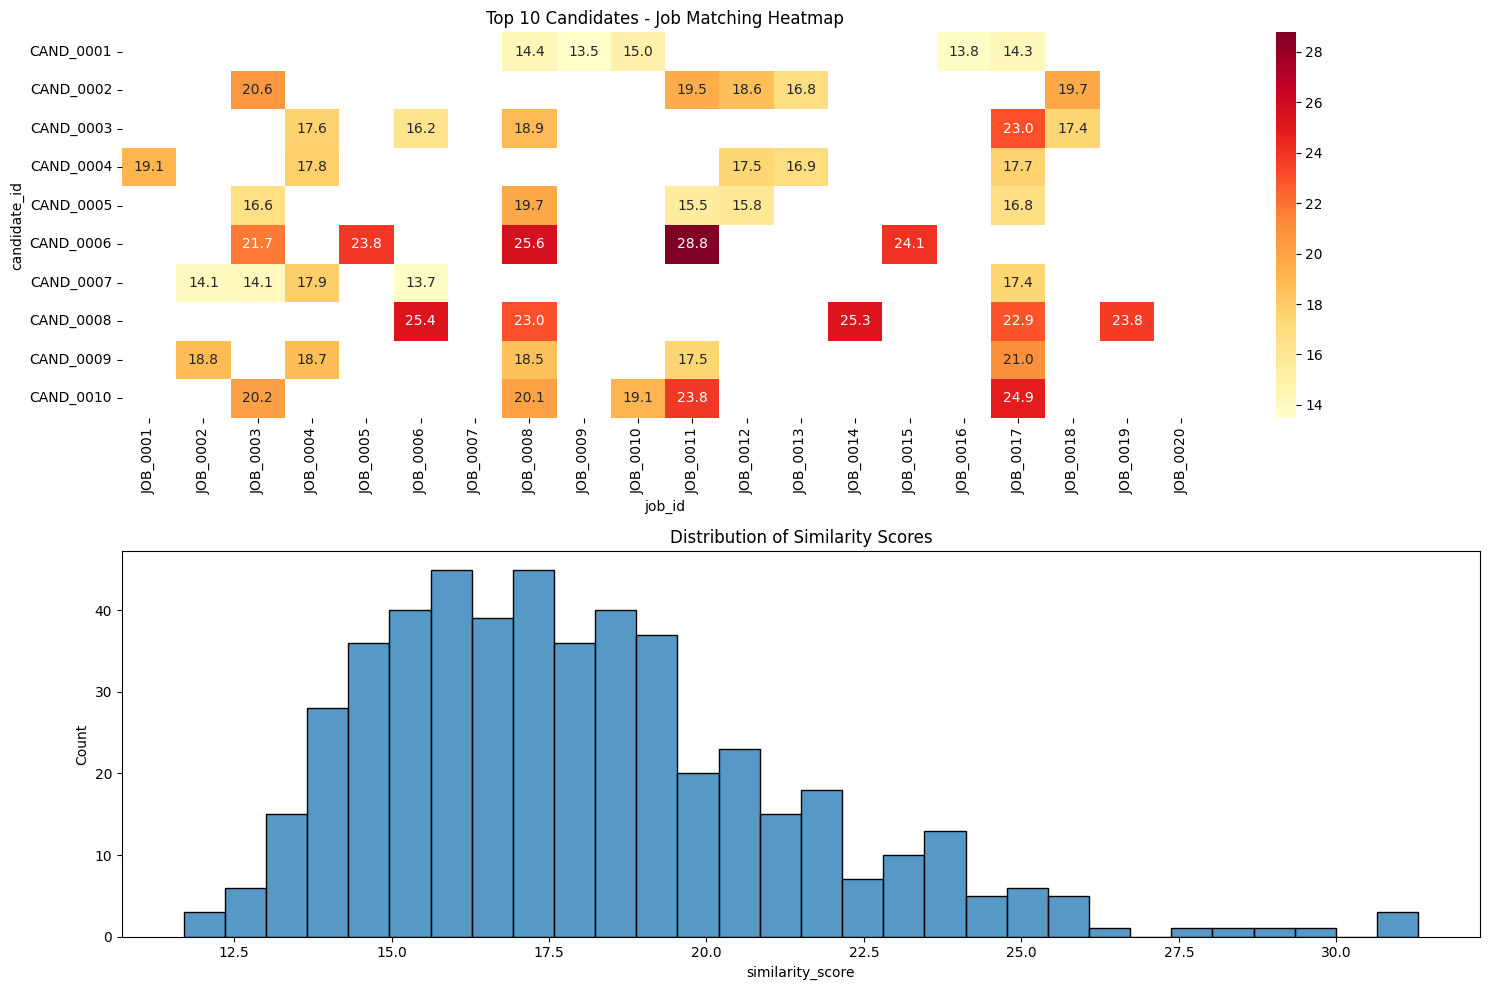

In [10]:
# Cell 10: Create visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Top matches heatmap
plt.subplot(2, 1, 1)
pivot_data = results.pivot_table(
    values='similarity_score',
    index='candidate_id',
    columns='job_id',
    aggfunc='first'
).head(10)

sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Top 10 Candidates - Job Matching Heatmap')

# Plot 2: Distribution of similarity scores
plt.subplot(2, 1, 2)
sns.histplot(data=results, x='similarity_score', bins=30)
plt.title('Distribution of Similarity Scores')

plt.tight_layout()
plt.show()

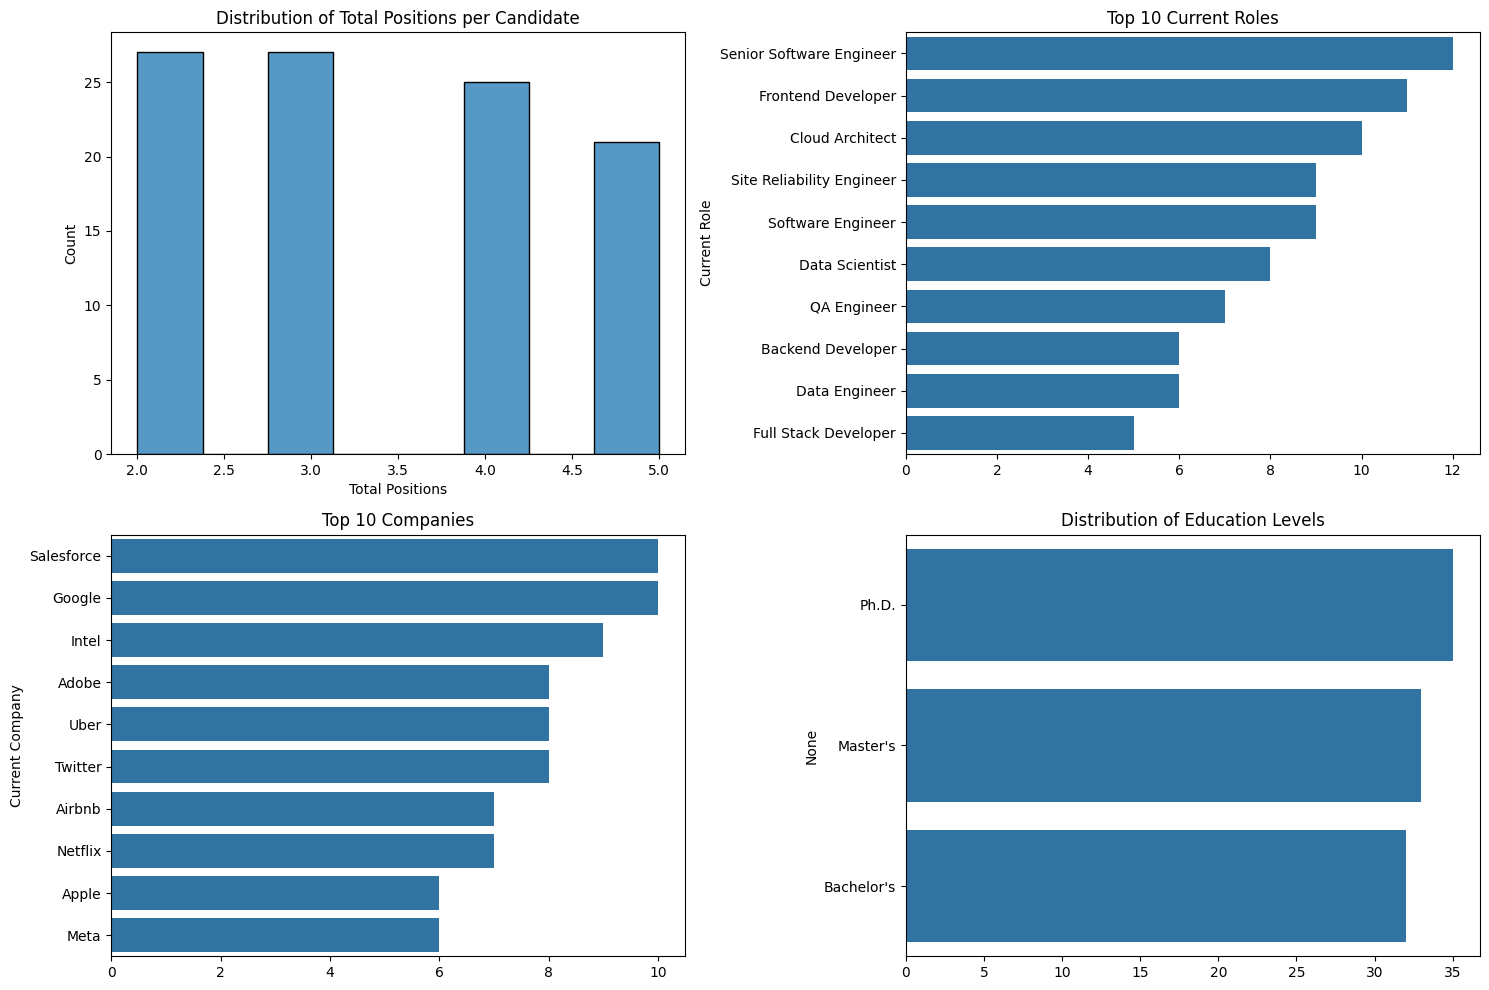

In [11]:
# Cell 11: Visualize candidate statistics
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of total positions
plt.subplot(2, 2, 1)
sns.histplot(data=candidate_df, x='Total Positions')
plt.title('Distribution of Total Positions per Candidate')

# Plot 2: Top current roles
plt.subplot(2, 2, 2)
role_counts = candidate_df['Current Role'].value_counts().head(10)
sns.barplot(x=role_counts.values, y=role_counts.index)
plt.title('Top 10 Current Roles')

# Plot 3: Companies distribution
plt.subplot(2, 2, 3)
company_counts = candidate_df['Current Company'].value_counts().head(10)
sns.barplot(x=company_counts.values, y=company_counts.index)
plt.title('Top 10 Companies')

# Plot 4: Education levels
plt.subplot(2, 2, 4)
education_counts = pd.Series([r['education']['degree'] for r in resumes]).value_counts()
sns.barplot(x=education_counts.values, y=education_counts.index)
plt.title('Distribution of Education Levels')

plt.tight_layout()
plt.show()